In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data
batting = pd.read_csv('df_batting.csv')
bowling = pd.read_csv('df_bowling.csv')
match = pd.read_csv('df_match.csv')
players = pd.read_csv('df_players.csv')

In [3]:
# Data structures

# Batting
batting.info()
batting.head()

# Bowling
bowling.info()
bowling.head()

# Match
match.info()
match.head()

# Players
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   SR           699 non-null    object
 9   out/not_out  699 non-null    object
 10  match_id     699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        500 non-null    object 
 1   bowlingTeam  500 non-null    object 
 2   bowlerName   500 non-null    obje

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...


In [4]:
# Check for missing data

batting.isnull().sum() # No missing data
bowling.isnull().sum() # No missing data
match.isnull().sum() # Missing data in margin column
players.isnull().sum() # Missing data in image, bowlingStyle, and description columns


name              0
team              0
image           188
battingStyle      0
bowlingStyle     20
playingRole       0
description      70
dtype: int64

Text(0, 0.5, 'Batsman Name')

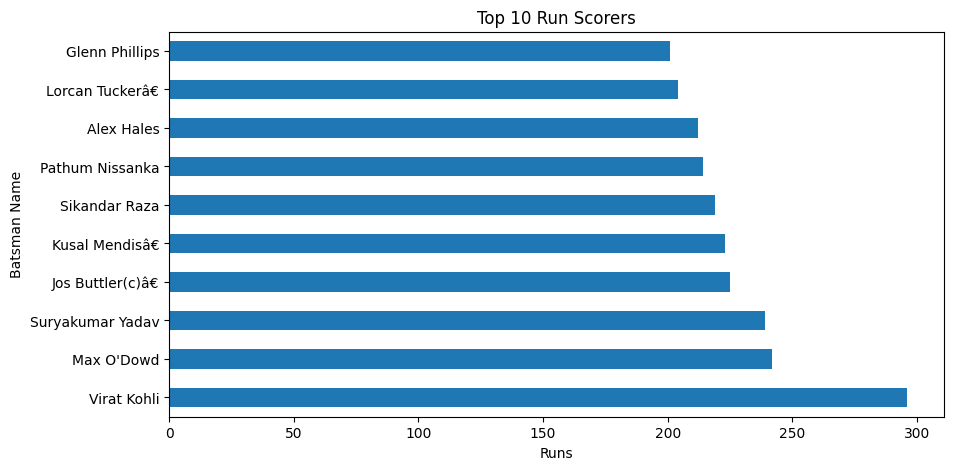

In [5]:
# Top run scorers

top_batsman = batting.groupby("batsmanName")["runs"].sum().sort_values(ascending=False).head(10)
top_batsman.plot(kind="barh", title="Top 10 Run Scorers", figsize=(10, 5))
plt.xlabel("Runs")
plt.ylabel("Batsman Name")

Text(0, 0.5, 'Bowler Name')

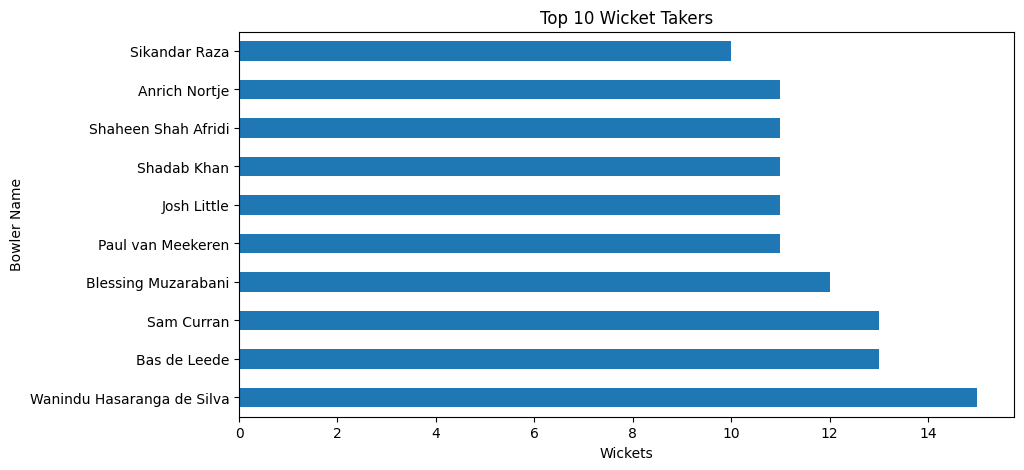

In [6]:
# Top wicket takers

top_bowlers = bowling.groupby("bowlerName")["wickets"].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind="barh", title="Top 10 Wicket Takers", figsize=(10, 5))
plt.xlabel("Wickets")
plt.ylabel("Bowler Name")

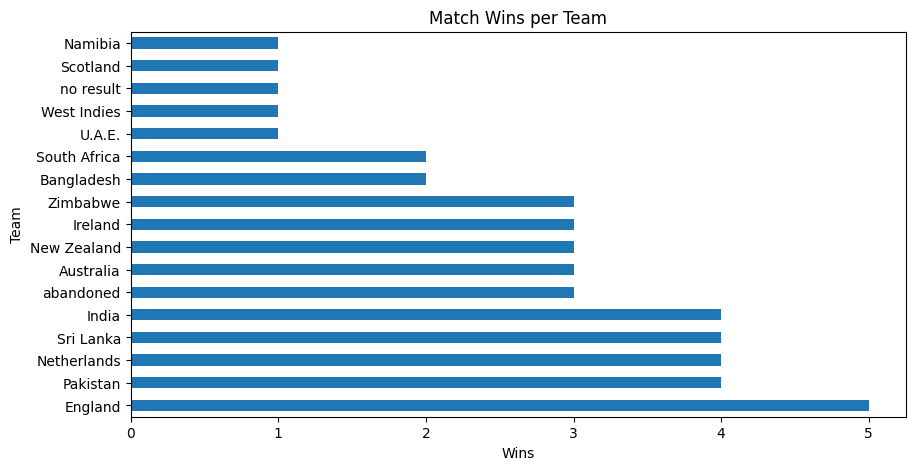

In [7]:
# Get wins per team

match["winner"].value_counts().plot(kind='barh', title="Match Wins per Team", figsize=(10, 5))
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

Text(0, 0.5, 'Ground')

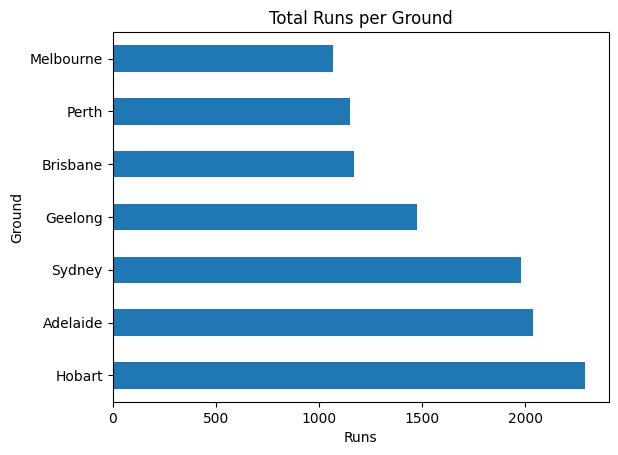

In [8]:
# Total number of runs per ground

batting_match = batting.merge(match[["match_id", "ground"]], on="match_id")
batting_match.groupby("ground")["runs"].sum().sort_values(ascending=False).head(10).plot(kind="barh", title="Total Runs per Ground")
plt.xlabel("Runs")
plt.ylabel("Ground")


In [9]:
# Top bowling averages

bowling_avg = bowling.groupby("bowlerName")[["runs", "wickets"]].apply(lambda x: x["runs"].sum() / x["wickets"].sum() if x["wickets"].sum() > 0 else np.nan).sort_values(ascending=True)
bowling_avg.head(10)

bowlerName
Glenn Maxwell      6.333333
Naveen-ul-Haq      7.000000
Anrich Nortje      8.545455
Brandon Glover     8.571429
Jason Holder       9.800000
Afif Hossain      11.000000
Sam Curran        11.384615
Zahoor Khan       11.400000
Mark Wood         12.000000
Basil Hameed      12.333333
dtype: float64